# Anomaly Detection System Documentation

This Jupyter Notebook presents an anomaly detection system implemented in Python using computer vision techniques and deep learning models. The system performs real-time anomaly detection in a video stream by following these steps:

1. **Preprocessing and Establishing Baseline**
2. **Object Detection with TensorFlow**
3. **Anomaly Scoring**
4. **Alert Triggering**
5. **User Interface**


In [125]:
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [127]:
import cv2
import numpy as np
import tensorflow as tf


## 1. Preprocessing and Establishing Baseline

This step involves background subtraction to detect moving objects in the video stream. The `background_subtraction()` function takes a frame from the video stream as input and applies background subtraction using an appropriate method (not explicitly defined in the provided code). It returns a foreground mask highlighting the regions containing potential moving objects.


In [128]:
# Step 1: Preprocessing and establishing baseline
def background_subtraction(frame):
    fg_mask = bg_subtractor.apply(frame)
    return fg_mask

## 2. Object Detection with TensorFlow

In this step, object detection is performed using TensorFlow, potentially with pre-trained models like YOLO (You Only Look Once) or SSD (Single Shot MultiBox Detector). The `object_detection()` function takes a frame from the video stream, detects objects within it, and returns information about the detected objects, including their bounding boxes, labels, and confidence scores

In [130]:
# Step 2: Object detection with TensorFlow
def object_detection(frame):
    # Implement object detection using TensorFlow (e.g., with pre-trained models like YOLO or SSD)
    # Return detected objects (bounding boxes, labels, confidence scores)
    height, width = frame.shape[:2]

    # Prepare frame for YOLO input
    blob = cv2.dnn.blobFromImage(frame, scale, input_size, swapRB=True, crop=False)

    # Set input blob for YOLO network
    net.setInput(blob)

    # Perform forward pass
    outs = net.forward()

    # Process YOLO output
    objects = []
    for detection in outs:
        for i in range(0, detection.shape[0], 85):
            scores = detection[i+5:i+85]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[i] * width)
                center_y = int(detection[i+1] * height)
                w = int(detection[i+2] * width)
                h = int(detection[i+3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                objects.append((x, y, w, h, classes[class_id], confidence))

    return objects


## 3. Anomaly Scoring

The `calculate_anomaly_score()` function calculates an anomaly score based on the detected objects in a frame. For simplicity, the anomaly score is determined as the number of detected objects in the frame.


## 4. Alert Triggering

An alert is triggered if the anomaly score exceeds a predefined threshold. The `trigger_alert()` function compares the anomaly score with a threshold value. If the score is higher than the threshold, an anomaly is detected, and an alert is triggered. Otherwise, no anomaly is detected.

In [131]:
# Step 3: Anomaly scoring
def calculate_anomaly_score(frame, objects):
    # Calculate anomaly score based on detected objects
    # For simplicity, let's assume the anomaly score is the number of detected objects
    anomaly_score = len(objects)
    return anomaly_score

# Step 4: Alert triggering
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define a list to store anomaly scores
anomaly_scores_history = []

# Step 4: Alert triggering
def trigger_alert(anomaly_score, threshold=9):
    # Trigger alert if anomaly score exceeds threshold
    if anomaly_score > threshold:
        print("Anomaly detected! Raise alarm or send notification.")
    else:
        print("No anomaly detected.")
    # Append anomaly score to history
    anomaly_scores_history.append(anomaly_score)

## Main Function

The `main()` function orchestrates the entire anomaly detection process. It reads frames from the video stream, applies the preprocessing, object detection, anomaly scoring, and alert triggering steps sequentially. Additionally, it displays the video stream with annotations (detected objects) in real-time. The process continues until the user interrupts it or until the end of the video stream is reached.

Finally, the function plots the anomaly scores over time, providing a visual representation of the anomaly detection process throughout the video stream.


No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly detected.
No anomaly de

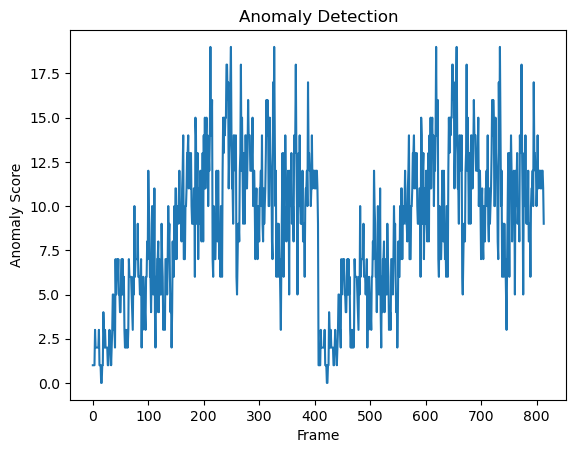

In [133]:
# Main function
def main():
    # Open video stream
    cap = cv2.VideoCapture('anomalybrawl.mp4')

    # Check if video stream is opened successfully
    if not cap.isOpened():
        print("Error: Couldn't open video stream")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Step 1: Preprocessing and establishing baseline
        fg_mask = background_subtraction(frame)

        # Step 2: Object detection
        detected_objects = object_detection(frame)

        # Step 3: Anomaly scoring
        anomaly_score = calculate_anomaly_score(frame, detected_objects)

        # Step 4: Alert triggering
        trigger_alert(anomaly_score)

        # Step 5: User interface
        display_video_with_annotations(frame, detected_objects)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot anomaly scores over time
    plt.plot(anomaly_scores_history)
    plt.xlabel('Frame')
    plt.ylabel('Anomaly Score')
    plt.title('Anomaly Detection')
    plt.show()

if __name__ == "__main__":
    main()


## Dependencies

The code relies on the following libraries:

- OpenCV (`cv2`)
- NumPy (`numpy`)
- TensorFlow (`tensorflow`)
- Matplotlib (`matplotlib.pyplot`)

Ensure that these libraries are installed in your environment before running the code.

---

## Usage

1. Ensure all dependencies are installed.
2. Place the video file named "anomalybrawl.mp4" in the same directory as this notebook(Original video link:https://www.youtube.com/watch?v=8-zeQAql95g).
3. Run the `main()` function.
4. Monitor the console for anomaly detection alerts and the plotted graph for anomaly scores over time.

The final Anomaly Score vs Frame output looks like 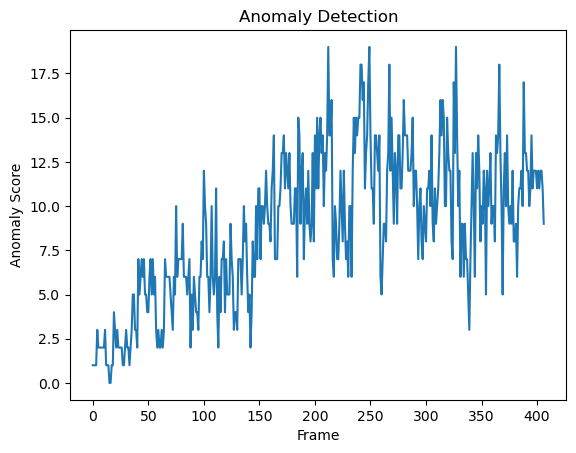